In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


****Load datasets****

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**Data preparation/cleasing**

Check null values, duplicates, feature selection, outliers, feature engeneering, feature scaling

In [5]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

# For numerical columns

# Initialize the imputer with your chosen strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')  # Using median as an example

# Fit the imputer on the training data
# Ensure you're selecting the column as a DataFrame to maintain the 2D shape
imputer.fit(train_df[['Fare']])

# Transform both training and test datasets using the fitted imputer
# This replaces missing values in 'Fare' based on the median of 'Fare' in the training set
train_df['Fare'] = imputer.transform(train_df[['Fare']])
test_df['Fare'] = imputer.transform(test_df[['Fare']])


In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [10]:
#Remove non numerical features 

train_df = train_df.drop (columns = ['Name','Ticket','Cabin','Embarked'])

In [11]:
train_df = pd.get_dummies(train_df, columns=['Sex'])

In [12]:
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,False,True
1,2,1,1,38.0,1,0,71.2833,True,False
2,3,1,3,26.0,0,0,7.9250,True,False
3,4,1,1,35.0,1,0,53.1000,True,False
4,5,0,3,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,True
887,888,1,1,19.0,0,0,30.0000,True,False
888,889,0,3,NaN,1,2,23.4500,True,False
889,890,1,1,26.0,0,0,30.0000,False,True


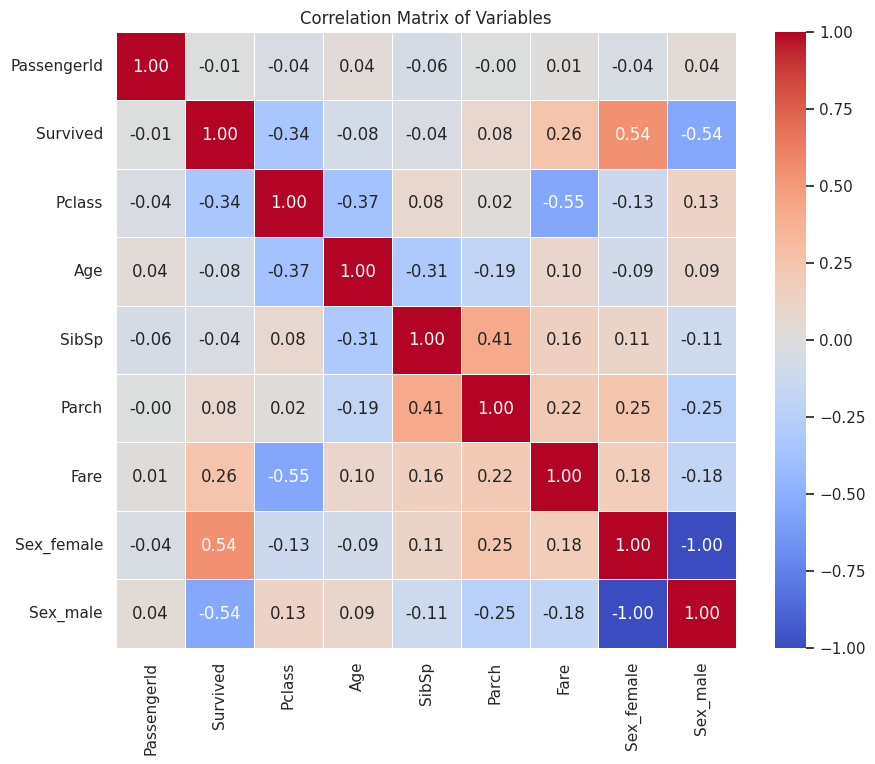

In [13]:
# Assuming df is your DataFrame and 'target' is the name of your target variable
correlation_matrix = train_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is used for the heatmap

# Optional: Use seaborn style for the plot
sns.set(style="white")

# Create a figure and a set of subplots
plt.figure(figsize=(10, 8))

# Plotting the heatmap
# annot=True to print the values inside the square
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Variables')
plt.show()


**Prepare datasets**

In [14]:
#Feature selection
y = train_df["Survived"]

features = ["Pclass", "Sex_female",'Sex_male', "SibSp", "Parch", 'Fare']

X = train_df[features]

In [15]:
#Encoding variable sex for the model
test_df = pd.get_dummies(test_df, columns=['Sex'])

#Feature selection
features = ["Pclass", "Sex_female","Sex_male", "SibSp", "Parch",'Fare']

X_test = test_df[features]

****Training and testing the model in a training and validation dataset****

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,Pclass,Sex_female,Sex_male,SibSp,Parch,Fare
331,1,False,True,0,0,28.5000
733,2,False,True,0,0,13.0000
382,3,False,True,0,0,7.9250
704,3,False,True,1,0,7.8542
813,3,True,False,4,2,31.2750
...,...,...,...,...,...,...
106,3,True,False,0,0,7.6500
270,1,False,True,0,0,31.0000
860,3,False,True,2,0,14.1083
435,1,True,False,1,2,120.0000


In [19]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None,5, 10, 20, 30],  # Maximum number of levels in tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
#     'bootstrap': [True, False]  # Method of selecting samples for training each tree
# }

# # Initialize the classifier
# rf = RandomForestClassifier()

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Best parameters found
# print("Best parameters:", grid_search.best_params_)


In [20]:
# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42, min_samples_leaf= 1, min_samples_split = 10)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [21]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")


Accuracy of the Random Forest model: 0.79


****Final Predictions****

In [22]:
predictions = rf_clf.predict(X_test)

In [23]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
